# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** ML models for imbalanced datasets



# Import modules
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Auxiliary functions
<hr style = "border:2px solid black" ></hr>

In [2]:
# Custom function for making polar plot
def make_polar_plot(data, plotlabel):
    N = len(data)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    radii = data
    width = 2 * np.pi / N

    ax = plt.subplot(111, polar=True)

    bars = ax.bar(theta, radii, width=width, bottom=0.0)
    ax.xaxis.set_ticks(theta)

    #ax.set_xticklabels(radii.index, fontsize=14)
    ax.set_xticklabels(['', '', ''])
    ax.tick_params(axis='x', which='major')

    cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

    for r, bar in zip(theta, bars):
        #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
        bar.set_facecolor(cmap(r / np.pi / 2))
        bar.set_alpha(0.7)
        bar.set_edgecolor('black')

    #ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

    ax.set_title(plotlabel, fontsize=14,
                 fontweight='bold', pad=5)  # Training set

    txt = plotlabel.split()
    txt2 = [x.capitalize() for x in txt]
    txt3 = ''.join(txt2)

    plt.tight_layout()

# Load the data
<hr style = "border:2px solid black" ></hr>

In [3]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/dataprofessor/data/master/hcv_classification.csv', index_col=False)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

# Class distribution
<hr style = "border:2px solid black" ></hr>

In [5]:
activity_count = y.value_counts()
activity_count

active      412
inactive    166
Name: Activity, dtype: int64

<AxesSubplot:ylabel='Activity'>

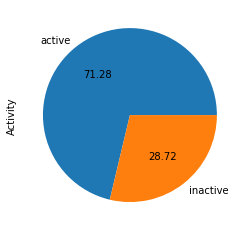

In [6]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x7fb3ee5d2140>,
 [Text(-0.6818247054992794, 0.863200481331435, 'active'),
  Text(0.6818247054992798, -0.8632004813314348, 'inactive')],
 [Text(-0.3719043848177887, 0.4708366261807827, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

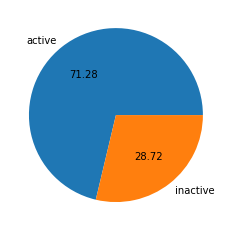

In [7]:
# Show pie plot (Approach 2)

fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=activity_count.index)

In [8]:
activity_count.index

Index(['active', 'inactive'], dtype='object')

# Data splitting
<hr style = "border:2px solid black" ></hr>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((462, 881), (462,), (116, 881), (116,))

<AxesSubplot:ylabel='Activity'>

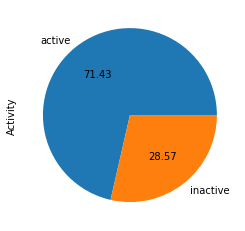

In [11]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [12]:
y_train.value_counts()

active      330
inactive    132
Name: Activity, dtype: int64

# Class balancing
<hr style = "border:2px solid black" ></hr>

## Random Undersampling

``'not minority'`` = resample all classes but the minority class

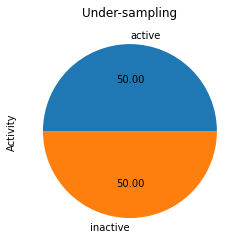

In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [14]:
# Class distribution
y_train_rus.value_counts()

active      132
inactive    132
Name: Activity, dtype: int64

## Random Oversampling

``"not majority"`` = resample all classes but the majority class



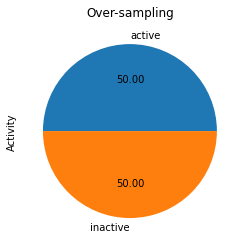

In [15]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [16]:
y_train_ros.value_counts()

active      330
inactive    330
Name: Activity, dtype: int64

---

# Model building
<hr style = "border:2px solid black" ></hr>

## Model building without class balancing

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.755845
2,MCC_test,0.721667


## Model building with undersampled balanced class

In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.792929
2,MCC_test,0.728203


## Model building with oversampled balanced class

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=5, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.903361
2,MCC_test,0.721667


## Model building with Class weight balancing

In [20]:
model = RandomForestClassifier(
    random_state=42, class_weight='balanced')  # Class weight balancing
model.fit(X_train, y_train)

# Training Cross-validation Models

model_cv = RandomForestClassifier(
    random_state=42, class_weight='balanced')  # Class weight balancing
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=5, scoring=cv_scoring)

# Apply model to make prediction

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'],
                      name='Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test],
                      name='Performance_metric_values')
df4 = pd.concat([df_labels, df_values], axis=1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.762438
2,MCC_test,0.676106


# Summary
<hr style = "border:2px solid black" ></hr>

In [21]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values,
                df4.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)', 'Class balancing (class weights)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,1.0,0.755845,0.721667
Class balancing (undersampling),1.0,0.792929,0.728203
Class balancing (oversampling),1.0,0.903361,0.721667
Class balancing (class weights),1.0,0.762438,0.676106


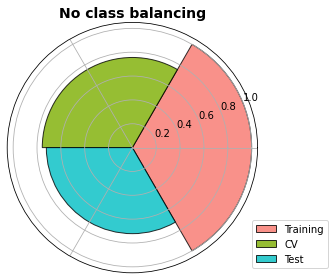

In [22]:
# No class balancing
data = df.iloc[0,:]

N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = data
width = 2 * np.pi / N

ax = plt.subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)
ax.xaxis.set_ticks(theta)

#ax.set_xticklabels(radii.index, fontsize=14)
ax.set_xticklabels(['','',''])
ax.tick_params(axis='x', which='major')

cmap = colors.ListedColormap(['#F8766D', '#7CAE00', '#00BFC4'])

for r, bar in zip(theta, bars):
    #bar.set_facecolor(plt.cm.hsv(r / np.pi / 2))
    bar.set_facecolor(cmap(r / np.pi / 2))
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')

ax.legend(bars, radii.index, loc='lower right', bbox_to_anchor=(1.3, 0) )

ax.set_title('No class balancing', fontsize=14, fontweight='bold', pad=5) # Training set

plt.tight_layout()

In [23]:
theta

array([0.       , 2.0943951, 4.1887902])

In [24]:
radii

Training    1.000000
CV          0.755845
Test        0.721667
Name: No class balancing, dtype: float64

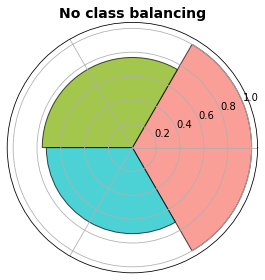

In [25]:
# No class balancing
data = df.iloc[0,:]

make_polar_plot(data, 'No class balancing')

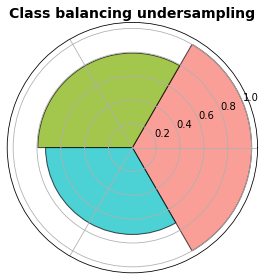

In [26]:
# Class balancing (undersampling)
data = df.iloc[1,:]

make_polar_plot(data, 'Class balancing undersampling')

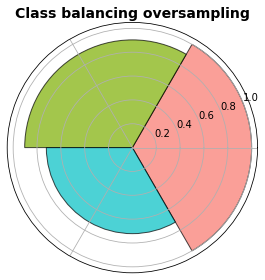

In [27]:
# Class balancing (oversampling)
data = df.iloc[2,:]

make_polar_plot(data, 'Class balancing oversampling')

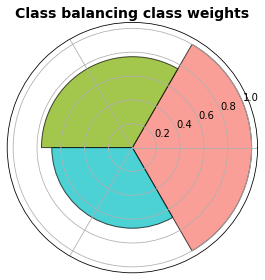

In [28]:
# Class balancing (class weights)
data = df.iloc[3,:]

make_polar_plot(data, 'Class balancing class weights')

# References
<hr style = "border:2px solid black" ></hr>


- https://github.com/dataprofessor/machine-learning-for-imbalanced-data

